In [1]:
import $ivy.`org.apache.spark::spark-sql:2.4.3`


import org.apache.spark.sql._
import org.apache.spark.sql.functions._


//Reducir numero logs
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)


//Circe para trabajar con JSON
import $ivy.`com.softwaremill.sttp.client::async-http-client-backend-monix:2.0.0-RC2`
import sttp.client.quick.{quickRequest, UriContext, backend}
import sttp.client.asynchttpclient.monix._


//Sttp para realizar request
import $ivy.`com.softwaremill.sttp.client::async-http-client-backend-monix:2.0.0-RC2`
import sttp.client.quick.{quickRequest, UriContext, backend}
import sttp.client.asynchttpclient.monix._
import sttp.client.basicRequest

//For adding extra dependenies
import $ivy.`org.typelevel::cats-core:1.6.0`

//Plotly
import $ivy.`org.plotly-scala::plotly-almond:0.7.1`
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

import $ivy.$                                  



import org.apache.spark.sql._

import org.apache.spark.sql.functions._


//Reducir numero logs

import org.apache.log4j.{Level, Logger}

import $ivy.$                                                                        

import sttp.client.quick.{quickRequest, UriContext, backend}

import sttp.client.asynchttpclient.monix._


//Sttp para realizar request

import $ivy.$                                                                        

import sttp.client.quick.{quickRequest, UriContext, backend}

import sttp.client.asynchttpclient.monix._

import sttp.client.basicRequest

//For adding extra dependenies

import $ivy.$                               

//Plotly

import $ivy.$                                      

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

In [2]:
//Iniciamos session de Spark
val spark = {
  NotebookSparkSession.builder()
    .master("local[*]")
    .getOrCreate()
}
import spark.implicits._

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

spark: SparkSession = org.apache.spark.sql.SparkSession@17d81ffa
import spark.implicits._

In [3]:
val mensual = spark.read
            .parquet("../data/parquet/dsBalanceNacionalPorRegionesMensual11-24.parquet")

parquet at cmd2.sc:2

1 / 1

mensual: DataFrame = [Familia: string, Tipo: string ... 6 more fields]

In [4]:
mensual.select("Region").distinct().show()

show at cmd3.sc:1

16 / 16

show at cmd3.sc:1

1 / 1

show at cmd3.sc:1

4 / 4

show at cmd3.sc:1

20 / 20

show at cmd3.sc:1

100 / 100

show at cmd3.sc:1

75 / 75

+--------------------+
|              Region|
+--------------------+
|Comunidad Valenciana|
|              Madrid|
|            Asturias|
|           Cantabria|
|         Extremadura|
|             Galicia|
|              Murcia|
|               Ceuta|
|            Canarias|
|     Castilla y Leon|
|           Andalucía|
|      Islas Canarias|
|      Islas Baleares|
|          Peninsular|
|            Cataluña|
|          Pais Vasco|
|             Navarra|
|            La Rioja|
|            Baleares|
|  Castilla la Mancha|
+--------------------+
only showing top 20 rows



In [8]:
//Quitar peninsular para quedarnos solo con comunidades
//Quitar compuesto === true para quitar la suma de energias renovables y no renovables
//Comprobar que los datos de las islas no estan duplicados

mensual.filter($"Region" === "Islas Canarias" || $"Region" === "Canarias" )
    .filter(date_format(col("FechaCompleta"), "yyyy").as("Año") !== "2010")
    .orderBy($"FechaCompleta", $"Tipo")  // Ordenar por Año, ya que FechaCompleta no estará disponible
    .show()

show at cmd7.sc:3

16 / 16

+------------+--------------------+---------+-------------------+--------------------+-----------------+--------------+--------------+
|     Familia|                Tipo|Compuesto|      FechaCompleta|          Porcentaje|            Valor|BajasEmisiones|        Region|
+------------+--------------------+---------+-------------------+--------------------+-----------------+--------------+--------------+
|No-Renovable|     Ciclo combinado|    false|2011-01-31 23:00:00| 0.30406479730559044|       190664.927|         false|      Canarias|
|No-Renovable|     Ciclo combinado|    false|2011-01-31 23:00:00| 0.30406479730559044|       190664.927|         false|Islas Canarias|
|No-Renovable|        Cogeneración|    false|2011-01-31 23:00:00| 0.00804070492193519|         5041.953|         false|      Canarias|
|No-Renovable|        Cogeneración|    false|2011-01-31 23:00:00| 0.00804070492193519|         5041.953|         false|Islas Canarias|
|     Demanda|     Demanda en b.c.|     true|2011-01-31

In [10]:
mensual.filter($"Region" === "Islas Canarias")
    .filter($"Tipo" === "Cogeneración")
    .show()

show at cmd9.sc:2

1 / 1

show at cmd9.sc:2

4 / 4

show at cmd9.sc:2

11 / 11

+------------+------------+---------+-------------------+--------------------+--------+--------------+--------------+
|     Familia|        Tipo|Compuesto|      FechaCompleta|          Porcentaje|   Valor|BajasEmisiones|        Region|
+------------+------------+---------+-------------------+--------------------+--------+--------------+--------------+
|No-Renovable|Cogeneración|    false|2010-12-31 23:00:00|0.003441424765223036|2467.847|         false|Islas Canarias|
|No-Renovable|Cogeneración|    false|2011-01-31 23:00:00| 0.00804070492193519|5041.953|         false|Islas Canarias|
|No-Renovable|Cogeneración|    false|2011-02-28 23:00:00| 0.00758341289131242|5258.092|         false|Islas Canarias|
|No-Renovable|Cogeneración|    false|2011-03-31 22:00:00|0.007349982805706321| 4794.57|         false|Islas Canarias|
|No-Renovable|Cogeneración|    false|2011-04-30 22:00:00|0.009124924405174081|6169.025|         false|Islas Canarias|
|No-Renovable|Cogeneración|    false|2011-05-31 22:00:00

In [10]:
regiones.take(5)

res9: Seq[String] = WrappedArray(
  "Comunidad Valenciana",
  "Madrid",
  "Asturias",
  "Cantabria",
  "Extremadura"
)

collect at cmd10.sc:12

16 / 16

collect at cmd10.sc:12

200 / 200

collect at cmd10.sc:12

200 / 200

collect at cmd10.sc:12

14 / 14

collect at cmd10.sc:13

16 / 16

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

14 / 14

collect at cmd10.sc:13

16 / 16

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

14 / 14

collect at cmd10.sc:13

16 / 16

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

14 / 14

collect at cmd10.sc:13

16 / 16

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

14 / 14

collect at cmd10.sc:13

16 / 16

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

200 / 200

collect at cmd10.sc:13

14 / 14

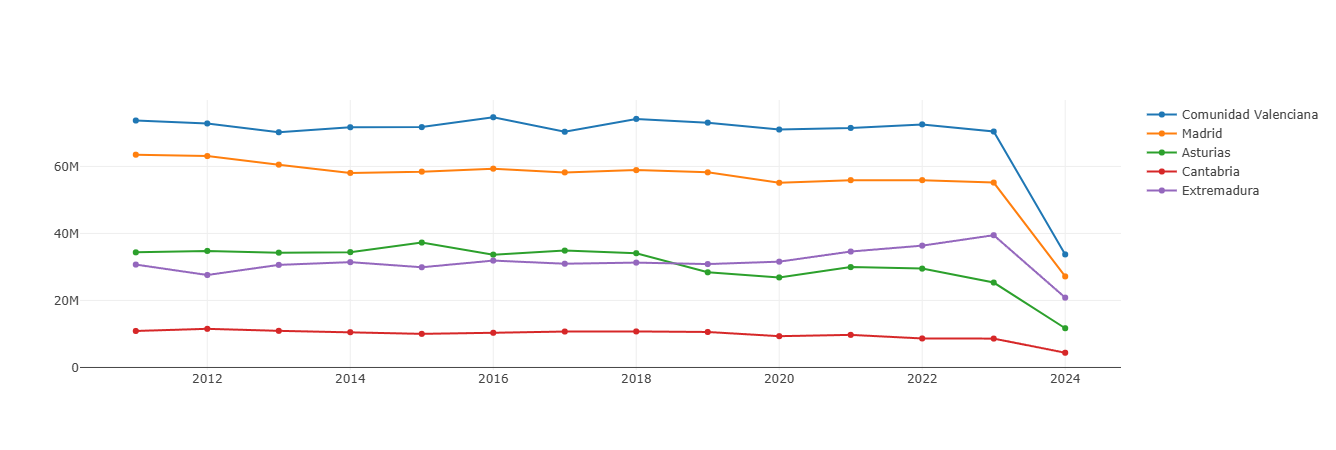

defined function AnalisisEnergiasAnual

In [11]:
def AnalisisEnergiasAnual(listaRegiones: Seq[String], df: DataFrame): Unit = {
  // Agrupar y calcular la media para datos renovables
  def calcularValorAnual(df: DataFrame, region: String): DataFrame = {
    df.filter(col("Region") === region)
      .filter(date_format(col("FechaCompleta"), "yyyy") =!= "2010")  
      .groupBy(date_format(col("FechaCompleta"), "yyyy").as("Año"))
      .agg(sum("Valor").as("ValorTotal"))
      .orderBy("Año")
  }

  val valores = listaRegiones.map(region => calcularValorAnual(df, region))
  val fechas = valores.head.select("Año").as[String].collect.toSeq
  val seqValores = valores.map(valor => valor.select("Valortotal").as[Double].collect.toSeq)

  val traces = listaRegiones.zip(seqValores).map { case (nombre, seqValor) =>
    Scatter(fechas, seqValor, name = nombre)
  }

  val data = traces
  plot(data)
}


AnalisisEnergiasAnual(regiones.take(5), mensual)

In [ ]:
mensual.filter($"Tipo" === "Hidráulica").select($"Region").distinct().show()

show at cmd36.sc:1

16 / 16

show at cmd36.sc:1

1 / 1

show at cmd36.sc:1

4 / 4

show at cmd36.sc:1

20 / 20

show at cmd36.sc:1 
 (kill)

32 + 17 / 100